In [1]:
import pandas as pd

df = pd.read_csv('datos_ML.csv')

In [2]:
# Eliminar outliers utilizando el método del rango intercuartil (IQR)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in df.columns:
    df = remove_outliers(df, column)

In [3]:
X = df.drop('Precio',axis = 1)
y = df['Precio']

In [4]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_val, y_val, X_test, y_test = train_valid_test_split(df, target = 'Precio',
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2, random_state=42)

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(592, 8)
(592,)
(198, 8)
(198,)
(198, 8)
(198,)


(None, None)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Entrenar el modelo de Gradient Boosting
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Validar el modelo
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluar el modelo
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

val_mse, val_r2, test_mse, test_r2


(7932598772.281465, 0.6927843430360866, 7509134928.598171, 0.6842273420852324)

In [6]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

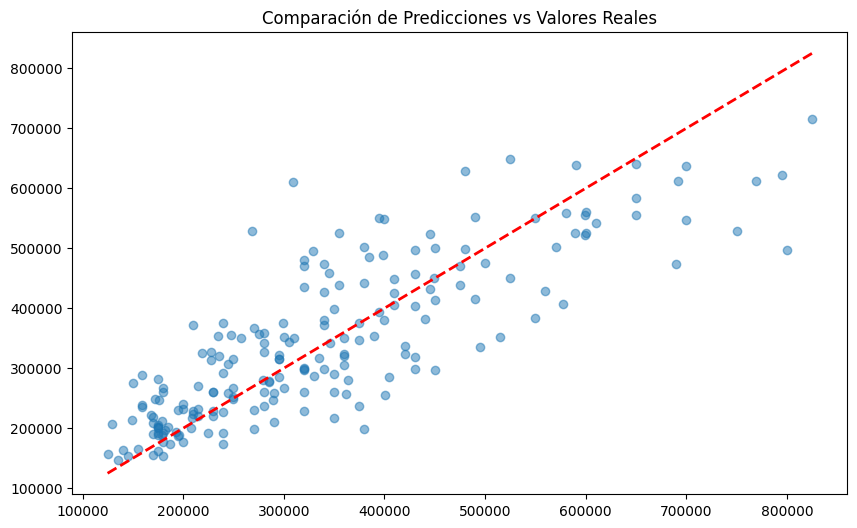

In [7]:
import matplotlib.pyplot as plt

# Crear la gráfica de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()


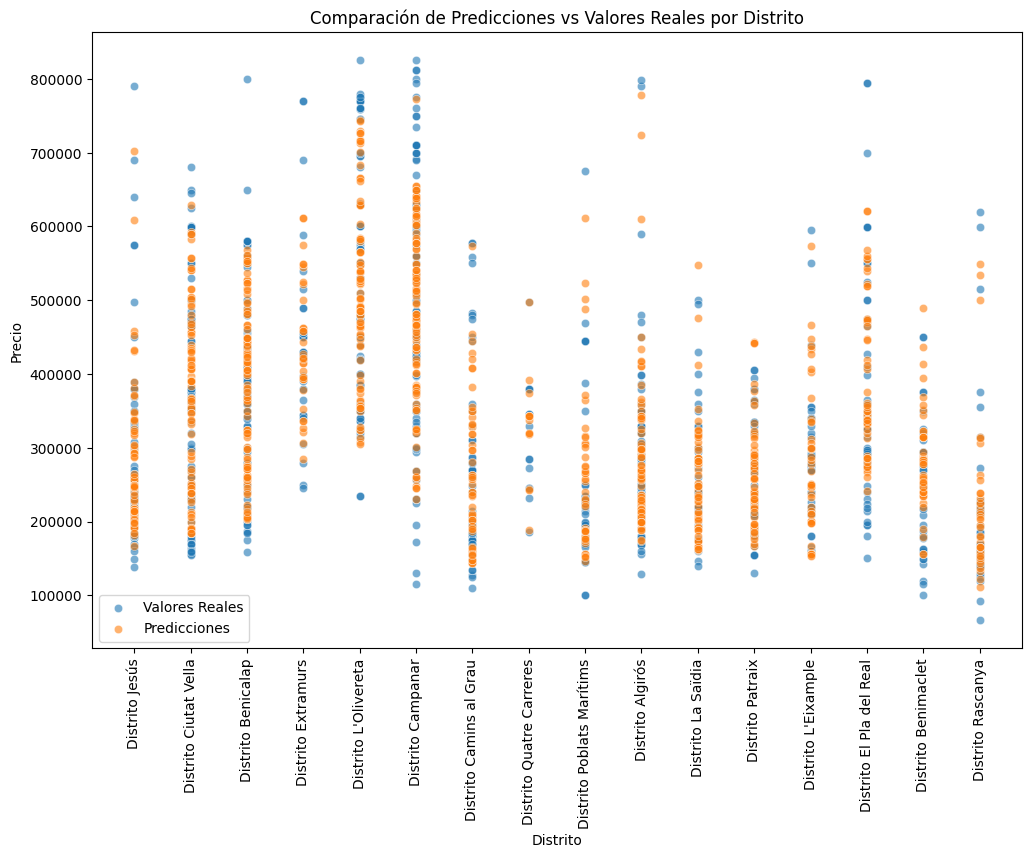

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de mapeo de distritos
diccionario_distritos = {
    0: 'Distrito L\'Eixample',
    1: 'Distrito Camins al Grau',
    2: 'Distrito Quatre Carreres',
    3: 'Distrito Ciutat Vella',
    4: 'Distrito El Pla del Real',
    5: 'Distrito Campanar',
    6: 'Distrito Extramurs',
    7: 'Distrito Benicalap',
    8: 'Distrito Benimaclet',
    9: 'Distrito L\'Olivereta',
    10: 'Distrito Poblats Marítims',
    11: 'Distrito La Saïdia',
    12: 'Distrito Patraix',
    13: 'Distrito Algirós',
    14: 'Distrito Jesús',
    15: 'Distrito Rascanya'
}

# Reemplazar valores numéricos por nombres de distritos en el eje x
df['Distrito'] = df['Distrito'].map(diccionario_distritos)

# Crear la gráfica comparando predicciones vs valores reales por distrito
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Distrito'], y=y, label='Valores Reales', alpha=0.6)
sns.scatterplot(x=df['Distrito'], y=model.predict(scaler.transform(X)), label='Predicciones', alpha=0.6)
plt.xlabel('Distrito')
plt.ylabel('Precio')
plt.title('Comparación de Predicciones vs Valores Reales por Distrito')
plt.xticks(rotation=90)
plt.legend()
plt.show()

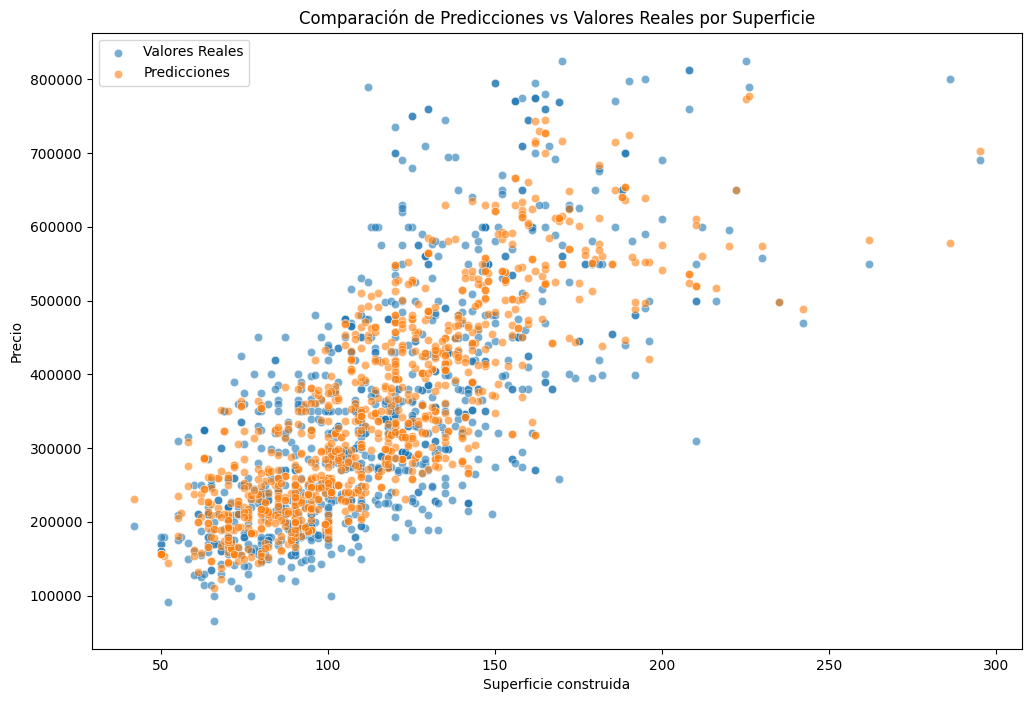

In [9]:
# Crear la gráfica comparando predicciones vs valores reales por superficie
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Superficie construida'], y=y, label='Valores Reales', alpha=0.6)
sns.scatterplot(x=df['Superficie construida'], y=model.predict(scaler.transform(X)), label='Predicciones', alpha=0.6)
plt.xlabel('Superficie construida')
plt.ylabel('Precio')
plt.title('Comparación de Predicciones vs Valores Reales por Superficie')
plt.legend()
plt.show()